In [217]:
import main
import numpy as np
import matplotlib.pyplot as plt
import peakutils
import pandas as pd

../Rawdata/10mM_2_amino_9_Fl_1_2_ChCl_EG__negative.DTA.txt Opened
1


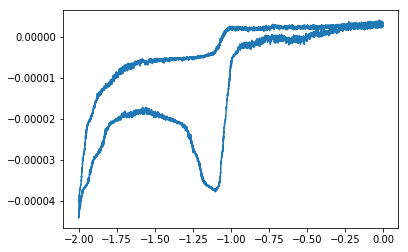

In [195]:
dict_1,n_cycle = main.read_file('../Rawdata/10mM_2_amino_9_Fl_1_2_ChCl_EG__negative.DTA.txt')
for i in range(n_cycle):
        print(i+1)
        df = main.data_frame(dict_1, i+1)
        plt.plot(df.Potential, df.Current, label = "Cycle{}".format(i+1))


In [196]:
df = main.data_frame(dict_1,1)
x = df['Potential']
y = df['Current']
main.peak_currents(df,[838],'Current')

array([6.18573e-07])

In [197]:
for i in range(n_cycle-1):
    i = i+1
    df = main.data_frame(dict_1,i)
    x = df['Potential']
    y = df['Current']
  
    #peak_index = main.peak_detection(y)
    
    x1,x2 = main.split(x)
    y1,y2 = main.split(y)
    y_base1 = main.linear_background(x1,y1)
    y_base2 = main.linear_background(x2,y2)
    
    
   

In [211]:
def peak_detection_fxn(data_y):
    """The function takes an input of the column containing the y variables in the dataframe,
    associated with the current. The function calls the split function, which splits the 
    column into two arrays, one of the positive and one of the negative values. 
    This is because cyclic voltammetry delivers negative peaks, but the peakutils function works
    better with positive peaks. The function also runs on the middle 80% of data to eliminate
    unnecessary noise and messy values associated with pseudo-peaks.The vectors are then imported 
    into the peakutils.indexes function to determine the significant peak for each array.
    The values are stored in a list, with the first index corresponding to the top peak and the
    second corresponding to the bottom peak.
    Parameters
    ______________
    y column: must be a column from a pandas dataframe
    
    Returns
    _____________
    A list with the index of the peaks from the top curve and bottom curve.
    """
    
    # initialize storage list
    index_list = []

    # split data into above and below the baseline
    col_y1, col_y2 = main.split(data_y)
    
    # detemine length of data and what 10% of the data is
    len_y = len(col_y1)
    ten_percent = int(np.around(0.1*len_y))
    
    # adjust both input columns to be the middle 80% of data
    # (take of the first and last 10% of data)
    # this avoid detecting peaks from electrolysis
    # (from water splitting and not the molecule itself,
    # which can form random "peaks")
    mod_col_y2 = col_y2[ten_percent:len_y-ten_percent]
    mod_col_y1 = col_y1[ten_percent:len_y-ten_percent]
    
    # run peakutils package to detect the peaks for both top and bottom
    peak_top = peakutils.indexes(mod_col_y2, thres=0.99, min_dist=20)
    peak_bottom = peakutils.indexes(abs(mod_col_y1), thres=0.99, min_dist=20)

    # detemine length of both halves of data
    len_top = len(peak_top)
    len_bot = len(peak_bottom)

    # append the values to the storage list
    # manipulate values by adding the ten_percent value back
    # (as the indecies have moved)
    # to detect the actual peaks and not the modified values
    index_list.append(peak_top[int(len_top/2)]+ten_percent)
    index_list.append(peak_bottom[int(len_bot/2)]+ten_percent)
    
    # return storage list
    # first value is the top, second value is the bottom
    return index_list

In [212]:
peak_detection_fxn(y)

[ 2.61865e-06  2.85199e-06  2.68532e-06 ... -4.29164e-05 -4.34497e-05
 -4.34831e-05]


[3549, 2227]

[3149]
[1806 1827]
[3549, 2227]


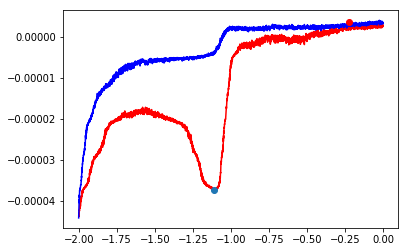

In [203]:
df = main.data_frame(dict_1, 1)
x = df['Potential']
y = df['Current']
peak_index = peak_detection(y)
print(peak_index)
x1,x2 = main.split(x)
y1,y2 = main.split(y)

plt.plot(x1,y1,color ='red')
plt.plot(x2,y2,color = 'blue')
plt.plot(x1[2227],y1[2227],marker='o')
plt.plot(x2[3549],y2[3549],marker='o',color = 'red')
plt.show()

In [134]:
main.critical_idx(x1,y1)

32

In [ ]:
main.critical_idx(x2,y2)

In [218]:
def test_peak_detection_fxn():
    list_y = [1, 1, 2, 3, 3, 8, 9, 6, 2, 0, 0, 0, -2, -3, -6, -7, -5, -2, -1, -1]
    df_y = pd.DataFrame(list_y)
    
    # check if the output type is a list
    assert isinstance(peak_detection_fxn(df_y), list)
    
    # check if the output value is an int
    # so it is known that it is an index and not the value
    assert (peak_detection_fxn(df_y)[0]) == int
    assert (peak_detection_fxn(df_y)[1]) == int
    
    # length of the storage list
    assert len(peak_detection_fxn(df_y)) == 2

In [219]:
test_peak_detection_fxn()

ValueError: too many values to unpack (expected 1)